In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
import numpy as np
warnings.filterwarnings('ignore')
sns.set_theme(style="whitegrid")

In [2]:
df = pd.read_csv('data_cleaned/person_cleaned.csv')

In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5817173 entries, 0 to 5817172
Data columns (total 17 columns):
 #   Column                 Dtype  
---  ------                 -----  
 0   COLLISION_ID           int64  
 1   PERSON_TYPE            object 
 2   PERSON_INJURY          object 
 3   PED_LOCATION           object 
 4   PED_ACTION             object 
 5   CONTRIBUTING_FACTOR_1  object 
 6   CONTRIBUTING_FACTOR_2  object 
 7   PERSON_SEX             object 
 8   CRASH_DATETIME         object 
 9   PED_ROLE               object 
 10  PERSON_AGE             float64
 11  EJECTION               object 
 12  EMOTIONAL_STATUS       object 
 13  POSITION_IN_VEHICLE    object 
 14  BODILY_INJURY          object 
 15  COMPLAINT              object 
 16  SAFETY_EQUIPMENT       object 
dtypes: float64(1), int64(1), object(15)
memory usage: 754.5+ MB


In [4]:
df['CRASH_DATETIME'] = pd.to_datetime(df['CRASH_DATETIME'])
df['PERSON_AGE'] = df['PERSON_AGE'].astype('int8')

In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5817173 entries, 0 to 5817172
Data columns (total 17 columns):
 #   Column                 Dtype         
---  ------                 -----         
 0   COLLISION_ID           int64         
 1   PERSON_TYPE            object        
 2   PERSON_INJURY          object        
 3   PED_LOCATION           object        
 4   PED_ACTION             object        
 5   CONTRIBUTING_FACTOR_1  object        
 6   CONTRIBUTING_FACTOR_2  object        
 7   PERSON_SEX             object        
 8   CRASH_DATETIME         datetime64[ns]
 9   PED_ROLE               object        
 10  PERSON_AGE             int8          
 11  EJECTION               object        
 12  EMOTIONAL_STATUS       object        
 13  POSITION_IN_VEHICLE    object        
 14  BODILY_INJURY          object        
 15  COMPLAINT              object        
 16  SAFETY_EQUIPMENT       object        
dtypes: datetime64[ns](1), int64(1), int8(1), object(14)
memory usage:

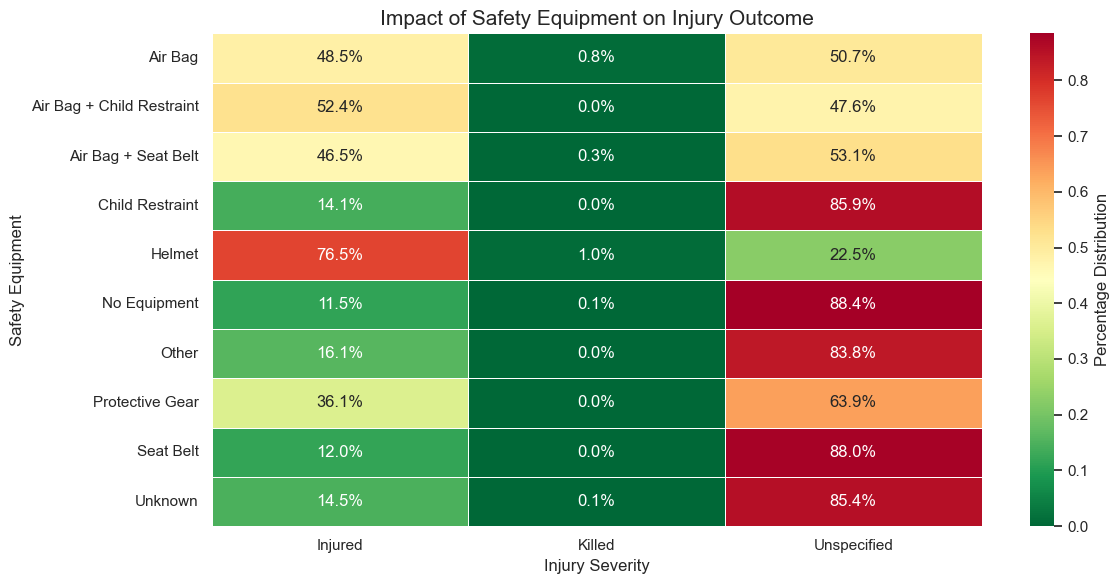

In [6]:
df_clean = df[df['SAFETY_EQUIPMENT'] != 'Does Not Apply']

# Create the Cross-Tabulation (Equipment vs. Injury)
ct = pd.crosstab(df_clean['SAFETY_EQUIPMENT'], df_clean['PERSON_INJURY'])

# Normalize to get percentages (Row-wise)
# This makes sure the colors represent the "share" of outcomes for that specific equipment
ct_norm = ct.div(ct.sum(1), axis=0)

# 4. Create the Plot
plt.figure(figsize=(12, 6))
sns.heatmap(ct_norm,
            annot=True,        # Show the numbers
            fmt=".1%",         # Format as percentage (e.g., 12.5%)
            cmap="RdYlGn_r",     # Red-Yellow-Green Palette
            linewidths=0.5,    # Add white grid lines for clarity
            linecolor='white', # Color of grid lines
            cbar_kws={'label': 'Percentage Distribution'}) # Label the color bar

plt.title("Impact of Safety Equipment on Injury Outcome", fontsize=15)
plt.ylabel("Safety Equipment", fontsize=12)
plt.xlabel("Injury Severity", fontsize=12)

# 5. Show the plot
plt.tight_layout()
plt.show()

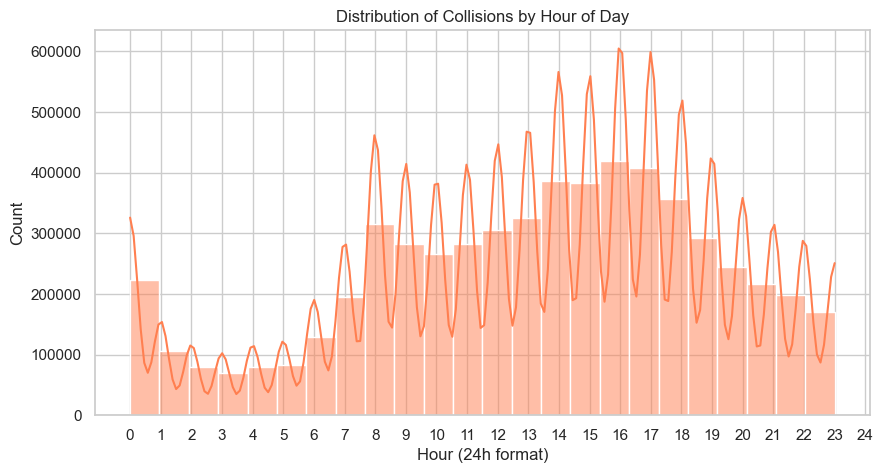

In [7]:
# Extract the hour
df['HOUR'] = df['CRASH_DATETIME'].dt.hour

plt.figure(figsize=(10, 5))
sns.histplot(data=df, x='HOUR', bins=24, kde=True, color='coral')
plt.title("Distribution of Collisions by Hour of Day")
plt.xlabel("Hour (24h format)")
plt.xticks(range(0, 25))
plt.show()

Text(0.5, 0, 'YEARS')

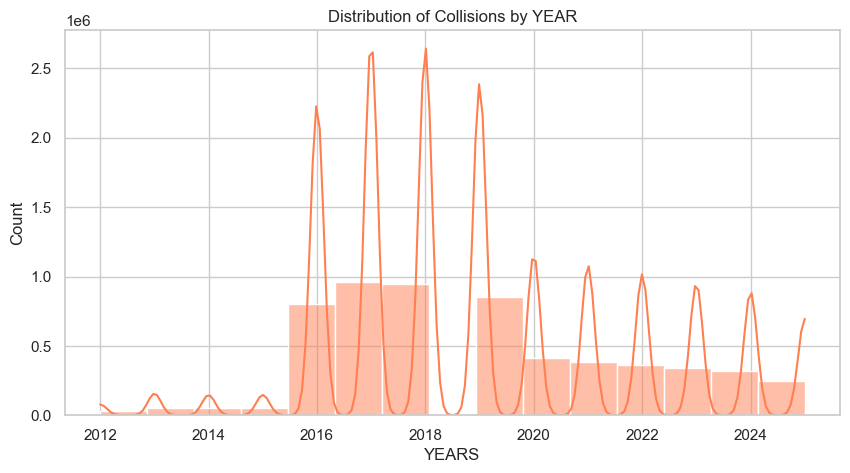

In [33]:
# Extract the year
df['YEAR'] = df['CRASH_DATETIME'].dt.year

plt.figure(figsize=(10, 5))
sns.histplot(data=df, x='YEAR', bins=15, kde=True, color='coral')
plt.title("Distribution of Collisions by YEAR")
plt.xlabel("YEARS")

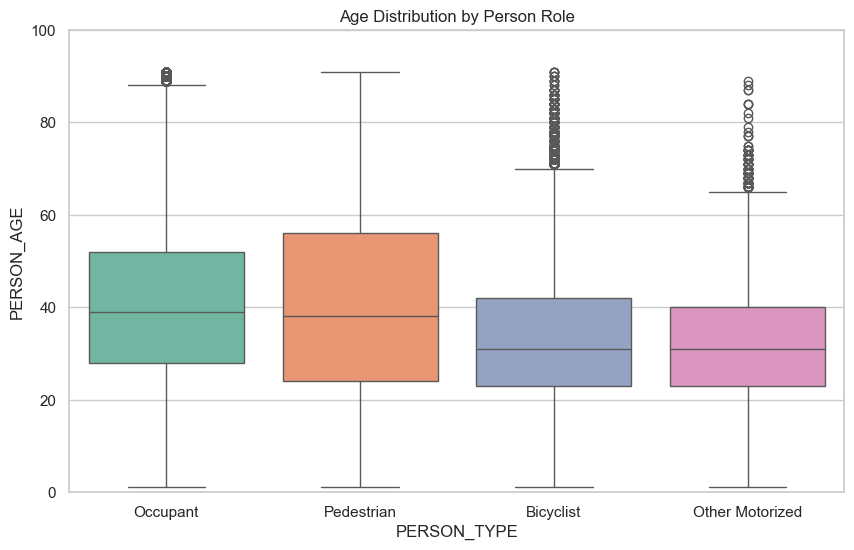

In [8]:
plt.figure(figsize=(10, 6))
sns.boxplot(data=df, x='PERSON_TYPE', y='PERSON_AGE', palette="Set2")
plt.title("Age Distribution by Person Role")
plt.ylim(0, 100) # Limit to 100 to ignore outliers/errors
plt.show()

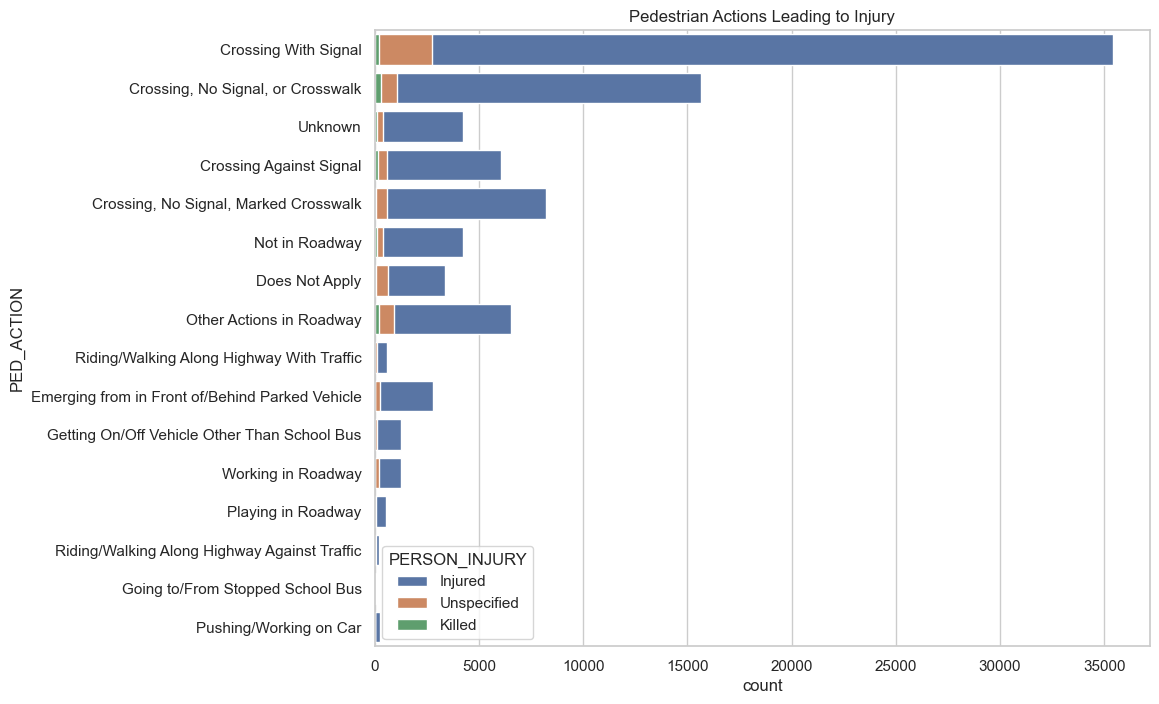

In [9]:
# Filter for pedestrians only
peds = df[df['PERSON_TYPE'] == 'Pedestrian']

plt.figure(figsize=(10, 8))
sns.countplot(data=peds, y='PED_ACTION', hue='PERSON_INJURY', dodge=False)
plt.title("Pedestrian Actions Leading to Injury")
plt.show()

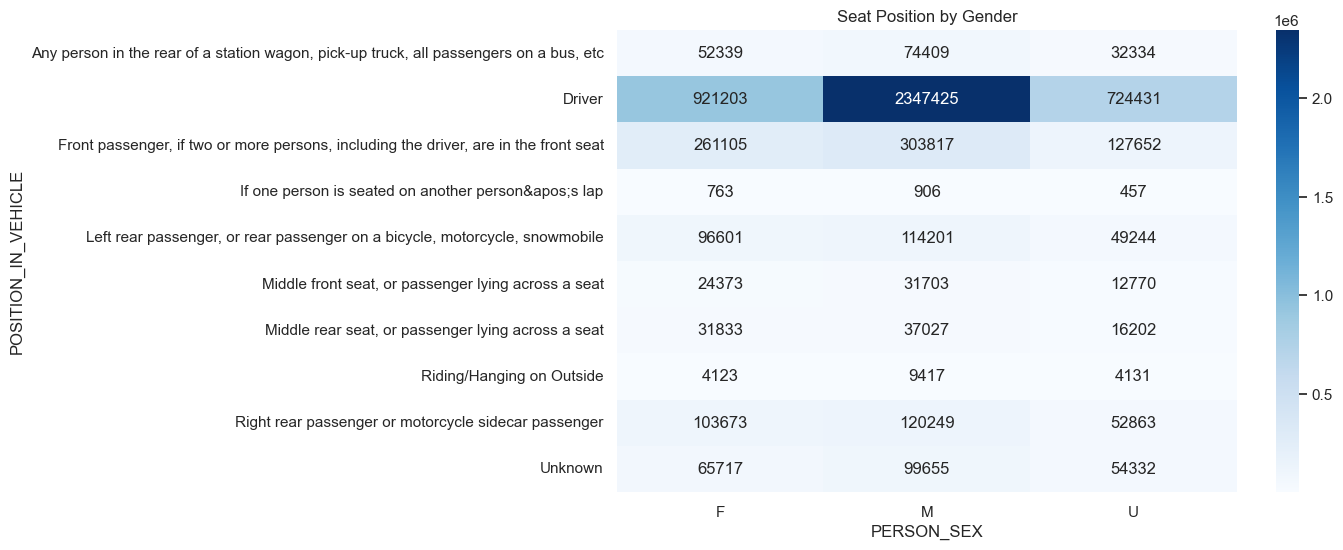

In [10]:
# Filter out 'Does Not Apply' to make the chart cleaner
subset = df[df['POSITION_IN_VEHICLE'] != 'Does Not Apply']

plt.figure(figsize=(10, 6))
sns.heatmap(pd.crosstab(subset['POSITION_IN_VEHICLE'], subset['PERSON_SEX']),
            annot=True, fmt='d', cmap="Blues")
plt.title("Seat Position by Gender")
plt.show()

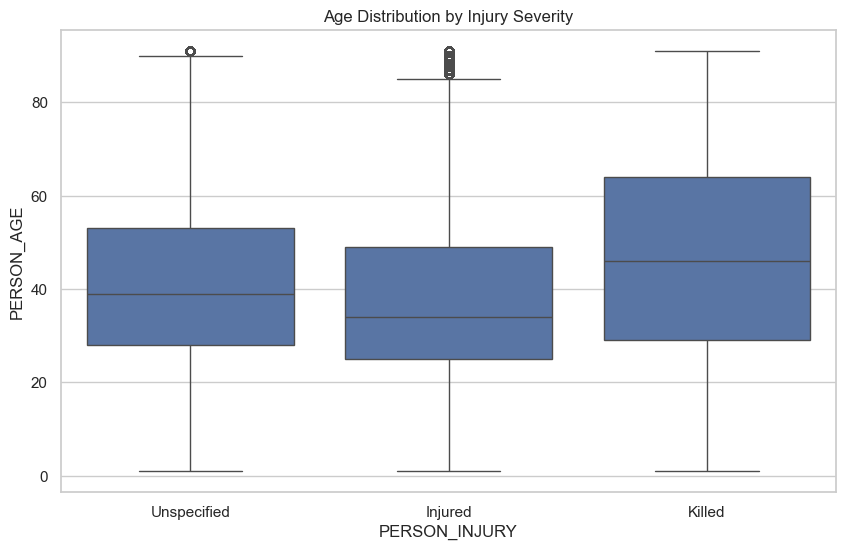

In [11]:
# --- Age Distribution by Injury Severity (Box Plot) ---
plt.figure(figsize=(10, 6))
sns.boxplot(x='PERSON_INJURY', y='PERSON_AGE', data=df)
plt.title('Age Distribution by Injury Severity')
plt.show()

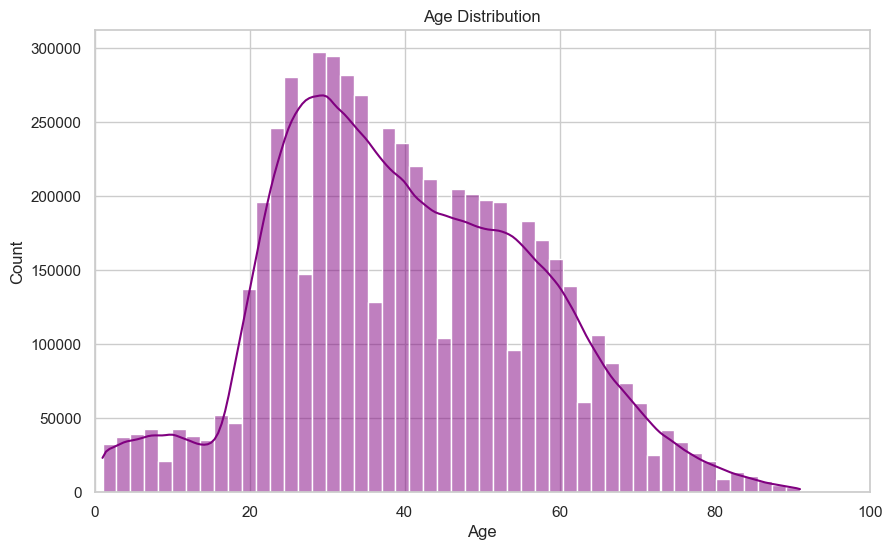

In [31]:
#  VISUALIZE THE AGE DISTRIBUTION
plt.figure(figsize=(10, 6))
sns.histplot(df['PERSON_AGE'], bins=50, kde=True, color='purple')
plt.title(f"Age Distribution")
plt.xlabel("Age")
plt.xlim(0, 100)
plt.show()

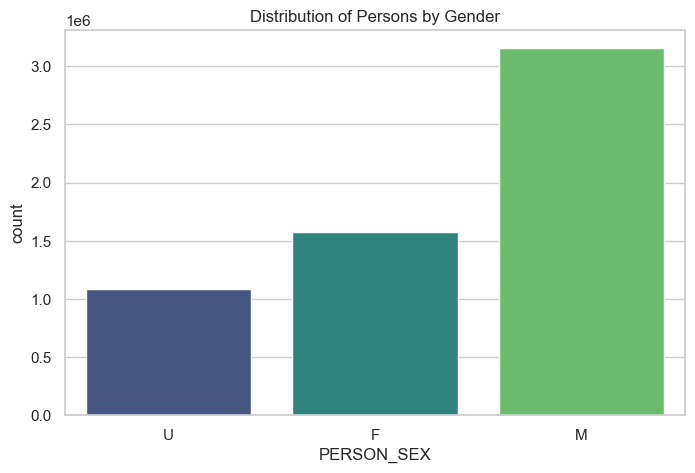

In [12]:
# --- Gender Distribution (Bar Chart) ---
plt.figure(figsize=(8, 5))
sns.countplot(x='PERSON_SEX', data=df, palette='viridis')
plt.title('Distribution of Persons by Gender')
plt.show()

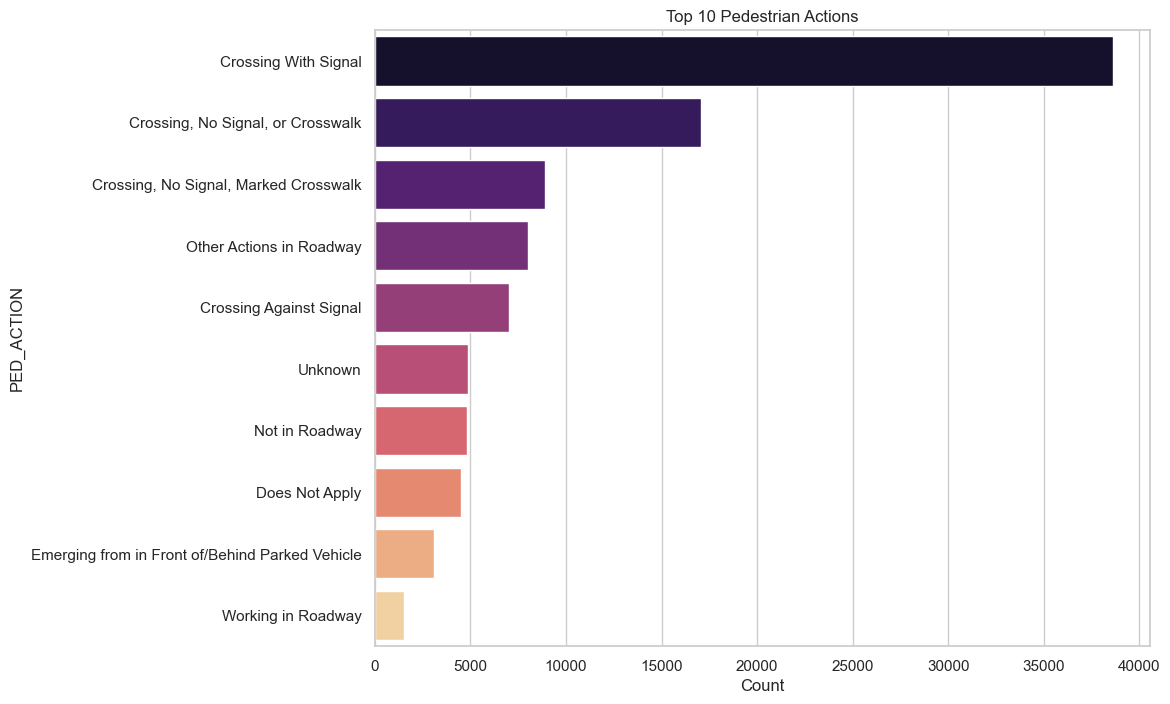

In [13]:
# --- Top 10 Pedestrian Actions (Horizontal Bar Chart) ---
plt.figure(figsize=(10, 8))
# Filter for non-null actions and take top 10
top_actions = df['PED_ACTION'].value_counts().head(10)
sns.barplot(y=top_actions.index, x=top_actions.values, palette='magma')
plt.title('Top 10 Pedestrian Actions')
plt.xlabel('Count')
plt.show()

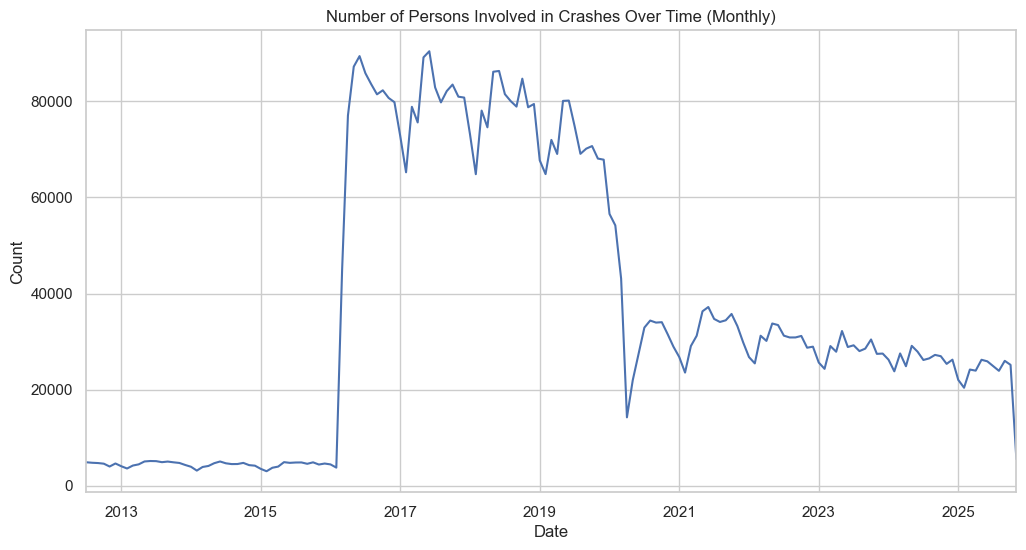

In [14]:
# --- Injuries Over Time (Line Chart) ---
# Resample by month to see trends
monthly_injuries = df.set_index('CRASH_DATETIME').resample('M').size()
plt.figure(figsize=(12, 6))
monthly_injuries.plot()
plt.title('Number of Persons Involved in Crashes Over Time (Monthly)')
plt.ylabel('Count')
plt.xlabel('Date')
plt.show()


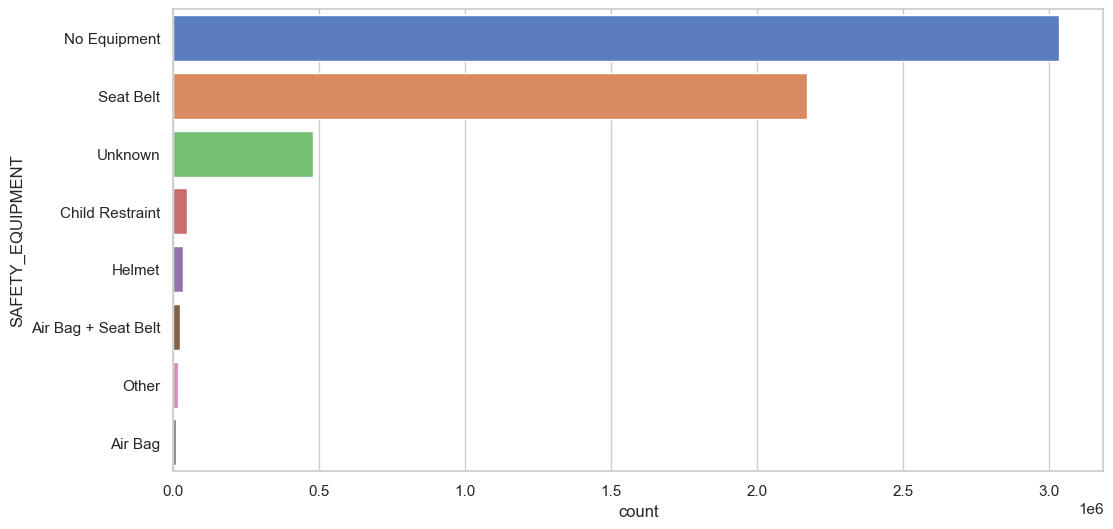

In [15]:
# --- Safety Equipment Usage (Count Plot) ---
plt.figure(figsize=(12, 6))
top_equipment = df['SAFETY_EQUIPMENT'].value_counts().head(8).index
sns.countplot(y='SAFETY_EQUIPMENT', data=df[df['SAFETY_EQUIPMENT'].isin(top_equipment)], order=top_equipment, palette='muted')
plt.show()

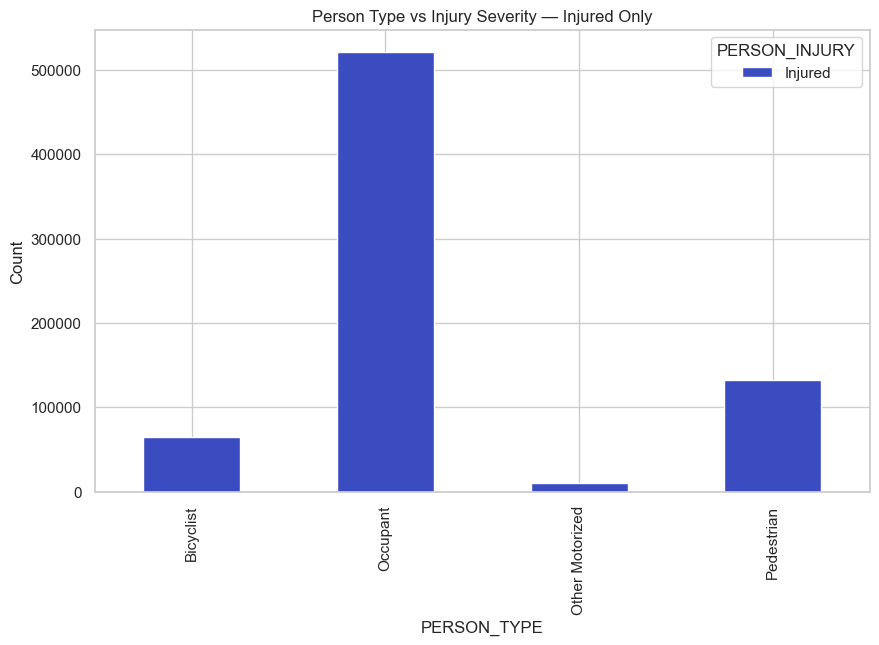

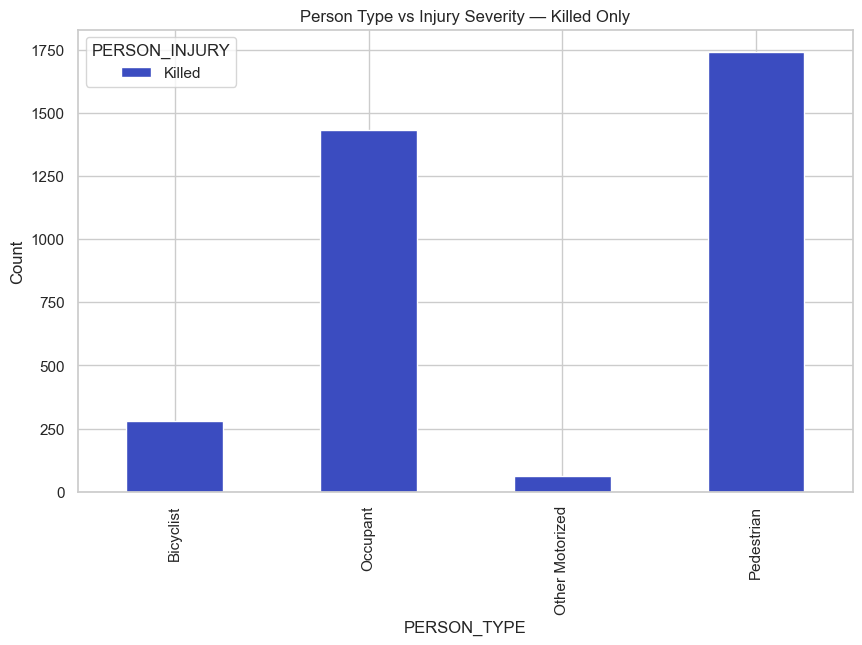

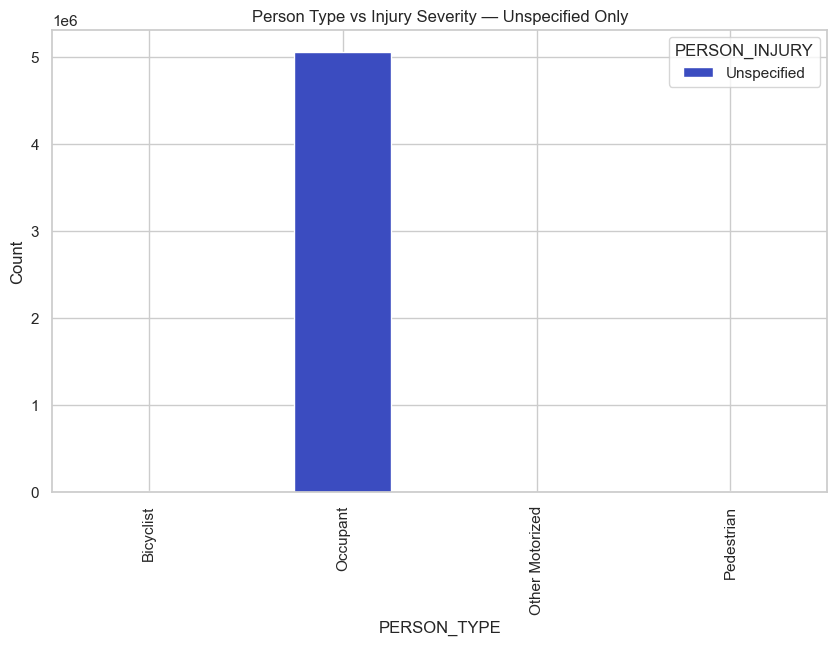

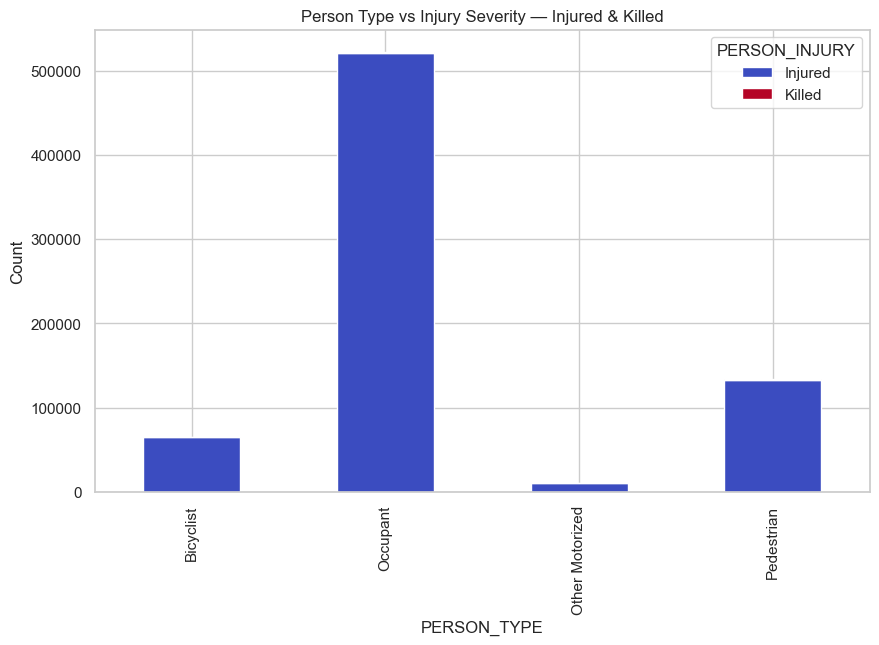

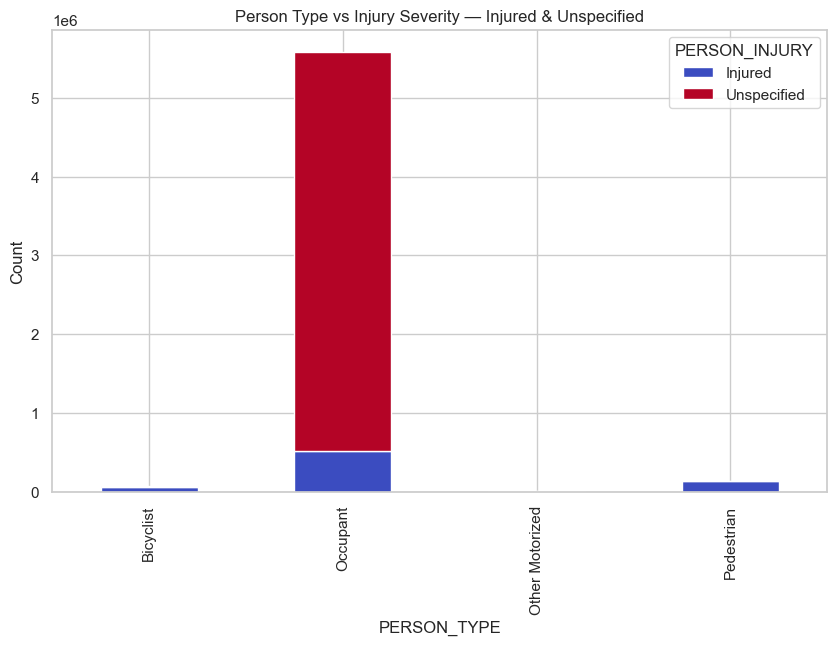

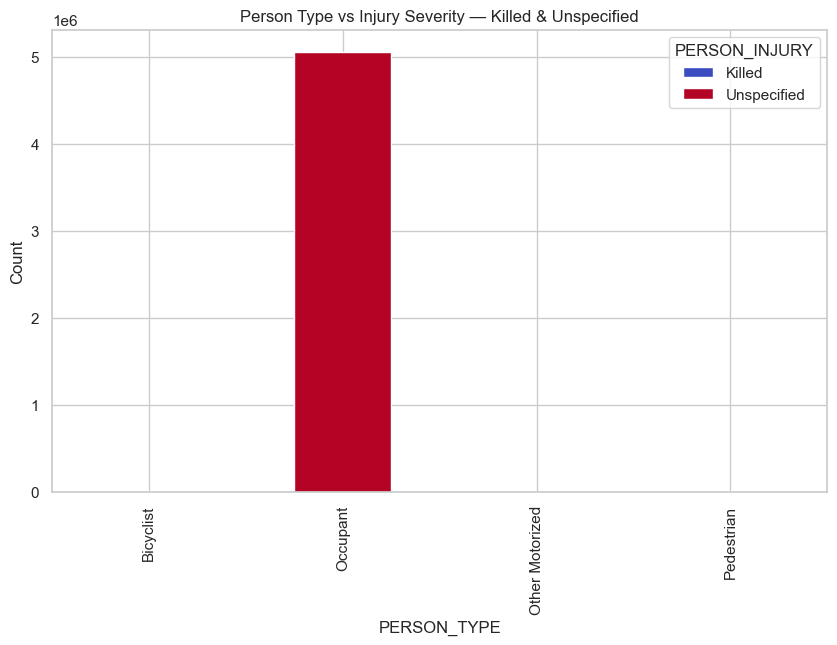

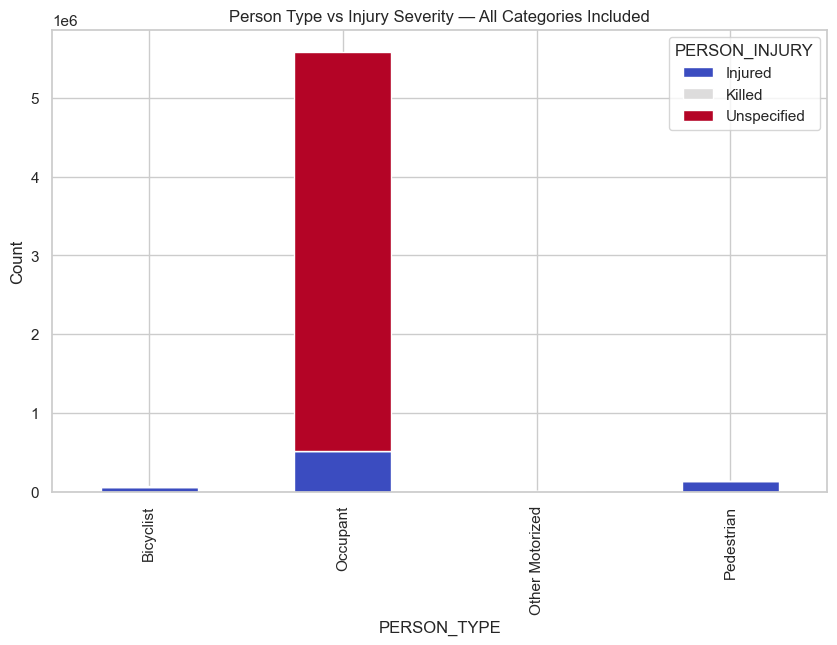

In [16]:
"""
This script generates a series of stacked bar charts showing how the distribution
of PERSON_TYPE varies across all possible combinations of PERSON_INJURY categories.
Each block filters the dataset by a specific injury combination and produces a
corresponding visualization, enabling systematic comparison across conditions.
"""

# ======================================================================
# Analysis for Injury Category: ('Injured',)
# ======================================================================
df_filtered = df[df['PERSON_INJURY'].isin(('Injured',))]

ct = pd.crosstab(
    df_filtered['PERSON_TYPE'],
    df_filtered['PERSON_INJURY']
)

ct.plot(kind='bar', stacked=True, figsize=(10, 6), colormap='coolwarm')
plt.title("Person Type vs Injury Severity — Injured Only")
plt.ylabel("Count")
plt.show()



# ======================================================================
# Analysis for Injury Category: ('Killed',)
# ======================================================================
df_filtered = df[df['PERSON_INJURY'].isin(('Killed',))]

ct = pd.crosstab(
    df_filtered['PERSON_TYPE'],
    df_filtered['PERSON_INJURY']
)

ct.plot(kind='bar', stacked=True, figsize=(10, 6), colormap='coolwarm')
plt.title("Person Type vs Injury Severity — Killed Only")
plt.ylabel("Count")
plt.show()



# ======================================================================
# Analysis for Injury Category: ('Unspecified',)
# ======================================================================
df_filtered = df[df['PERSON_INJURY'].isin(('Unspecified',))]

ct = pd.crosstab(
    df_filtered['PERSON_TYPE'],
    df_filtered['PERSON_INJURY']
)

ct.plot(kind='bar', stacked=True, figsize=(10, 6), colormap='coolwarm')
plt.title("Person Type vs Injury Severity — Unspecified Only")
plt.ylabel("Count")
plt.show()



# ======================================================================
# Analysis for Combination: ('Injured', 'Killed')
# ======================================================================
df_filtered = df[df['PERSON_INJURY'].isin(('Injured', 'Killed'))]

ct = pd.crosstab(
    df_filtered['PERSON_TYPE'],
    df_filtered['PERSON_INJURY']
)

ct.plot(kind='bar', stacked=True, figsize=(10, 6), colormap='coolwarm')
plt.title("Person Type vs Injury Severity — Injured & Killed")
plt.ylabel("Count")
plt.show()



# ======================================================================
# Analysis for Combination: ('Injured', 'Unspecified')
# ======================================================================
df_filtered = df[df['PERSON_INJURY'].isin(('Injured', 'Unspecified'))]

ct = pd.crosstab(
    df_filtered['PERSON_TYPE'],
    df_filtered['PERSON_INJURY']
)

ct.plot(kind='bar', stacked=True, figsize=(10, 6), colormap='coolwarm')
plt.title("Person Type vs Injury Severity — Injured & Unspecified")
plt.ylabel("Count")
plt.show()



# ======================================================================
# Analysis for Combination: ('Killed', 'Unspecified')
# ======================================================================
df_filtered = df[df['PERSON_INJURY'].isin(('Killed', 'Unspecified'))]

ct = pd.crosstab(
    df_filtered['PERSON_TYPE'],
    df_filtered['PERSON_INJURY']
)

ct.plot(kind='bar', stacked=True, figsize=(10, 6), colormap='coolwarm')
plt.title("Person Type vs Injury Severity — Killed & Unspecified")
plt.ylabel("Count")
plt.show()



# ======================================================================
# Analysis for Combination: ('Injured', 'Killed', 'Unspecified')
# ======================================================================
df_filtered = df[df['PERSON_INJURY'].isin(('Injured', 'Killed', 'Unspecified'))]

ct = pd.crosstab(
    df_filtered['PERSON_TYPE'],
    df_filtered['PERSON_INJURY']
)

ct.plot(kind='bar', stacked=True, figsize=(10, 6), colormap='coolwarm')
plt.title("Person Type vs Injury Severity — All Categories Included")
plt.ylabel("Count")
plt.show()

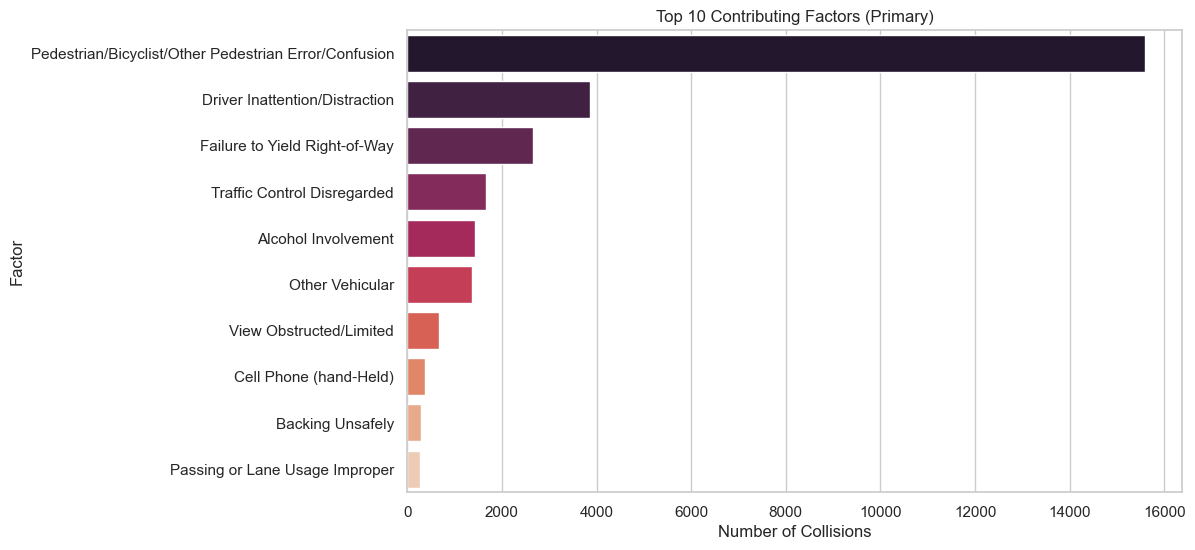

In [17]:
# Filter out 'Unspecified' if you want clearer specific causes
factors = df[df['CONTRIBUTING_FACTOR_1'] != 'Unspecified']['CONTRIBUTING_FACTOR_1'].value_counts().head(10)

plt.figure(figsize=(10, 6))
sns.barplot(y=factors.index, x=factors.values, palette='rocket')
plt.title("Top 10 Contributing Factors (Primary)")
plt.xlabel("Number of Collisions")
plt.ylabel("Factor")
plt.show()

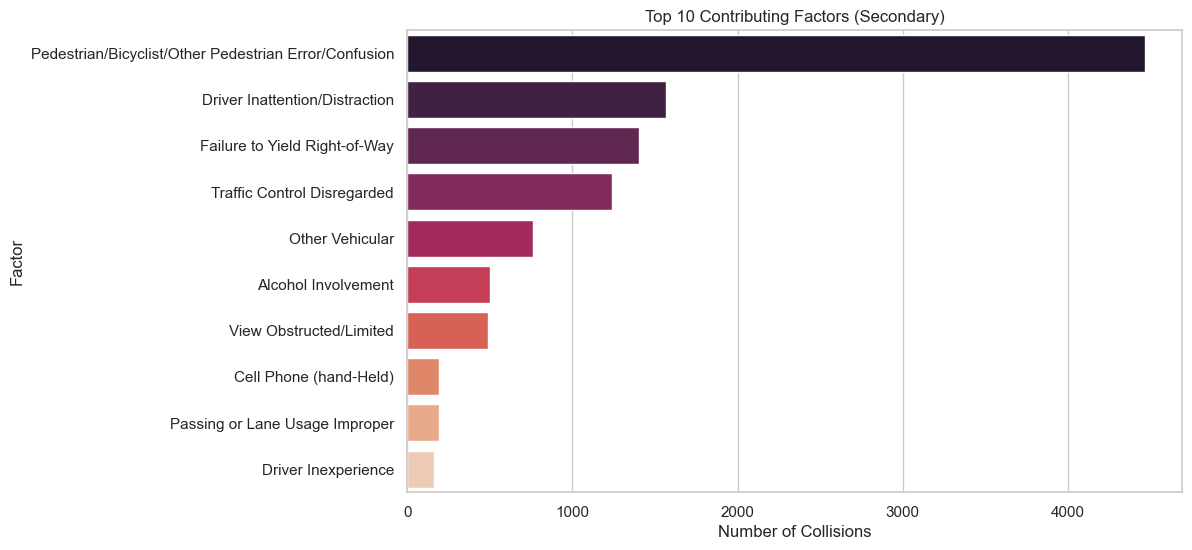

In [18]:
# Filter out 'Unspecified' if you want clearer specific causes
factors = df[df['CONTRIBUTING_FACTOR_2'] != 'Unspecified']['CONTRIBUTING_FACTOR_2'].value_counts().head(10)

plt.figure(figsize=(10, 6))
sns.barplot(y=factors.index, x=factors.values, palette='rocket')
plt.title("Top 10 Contributing Factors (Secondary)")
plt.xlabel("Number of Collisions")
plt.ylabel("Factor")
plt.show()

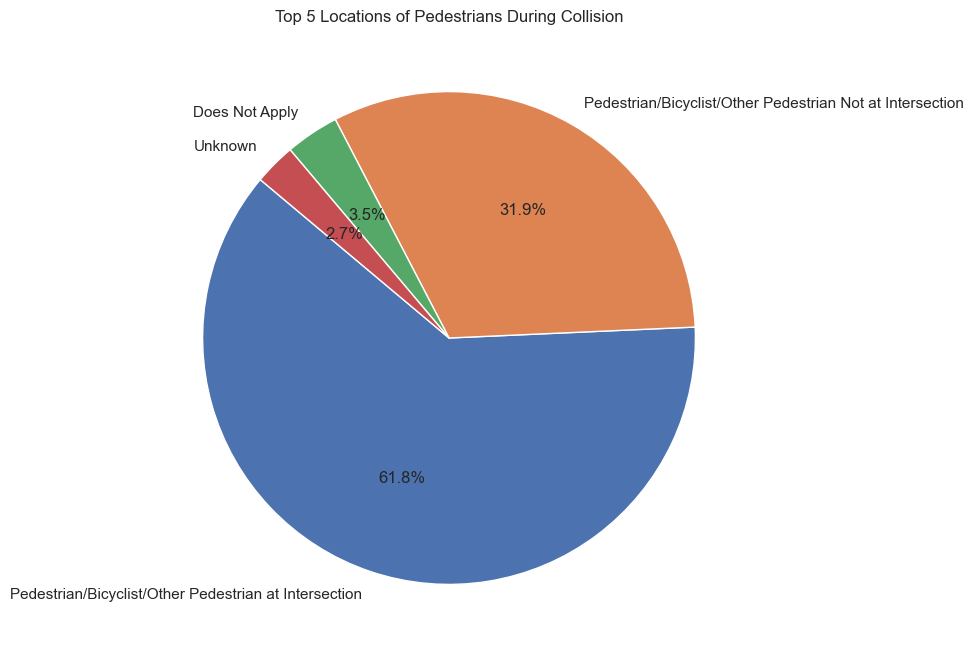

In [19]:
# Filter for Pedestrians only
ped_locs = df[(df['PERSON_TYPE'] == 'Pedestrian') & (df['PED_LOCATION'].notna())]['PED_LOCATION'].value_counts().head(5)

plt.figure(figsize=(8, 8))
plt.pie(ped_locs, labels=ped_locs.index, autopct='%1.1f%%', startangle=140)
plt.title("Top 5 Locations of Pedestrians During Collision")
plt.show()

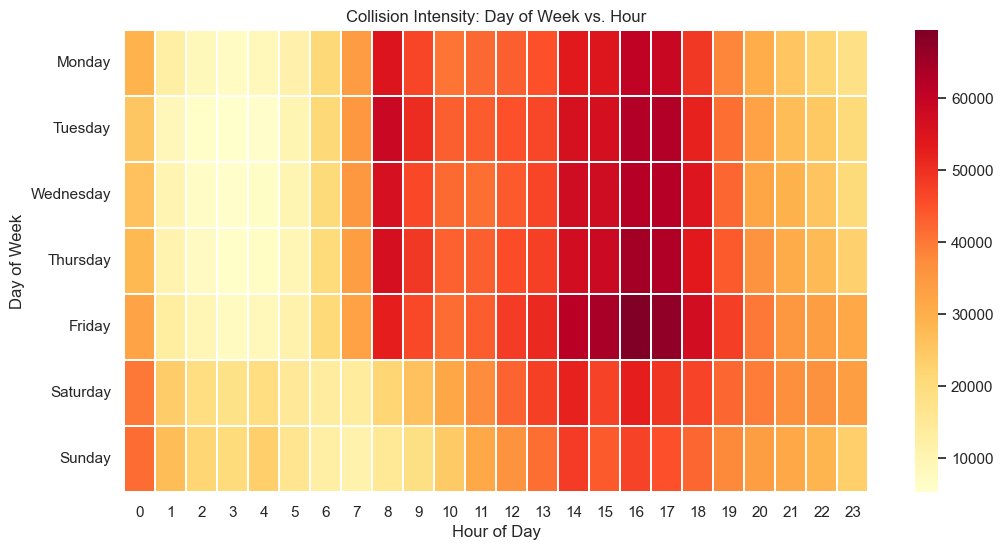

In [20]:
# Create Day of Week column (0=Monday, 6=Sunday)
df['DAY_OF_WEEK'] = df['CRASH_DATETIME'].dt.day_name()
# Order for plotting
order = ["Monday", "Tuesday", "Wednesday", "Thursday", "Friday", "Saturday", "Sunday"]

# Create pivot table
heatmap_data = df.groupby(['DAY_OF_WEEK', 'HOUR']).size().unstack().reindex(order)

plt.figure(figsize=(12, 6))
sns.heatmap(heatmap_data, cmap="YlOrRd", linewidths=0.1)
plt.title("Collision Intensity: Day of Week vs. Hour")
plt.xlabel("Hour of Day")
plt.ylabel("Day of Week")
plt.show()

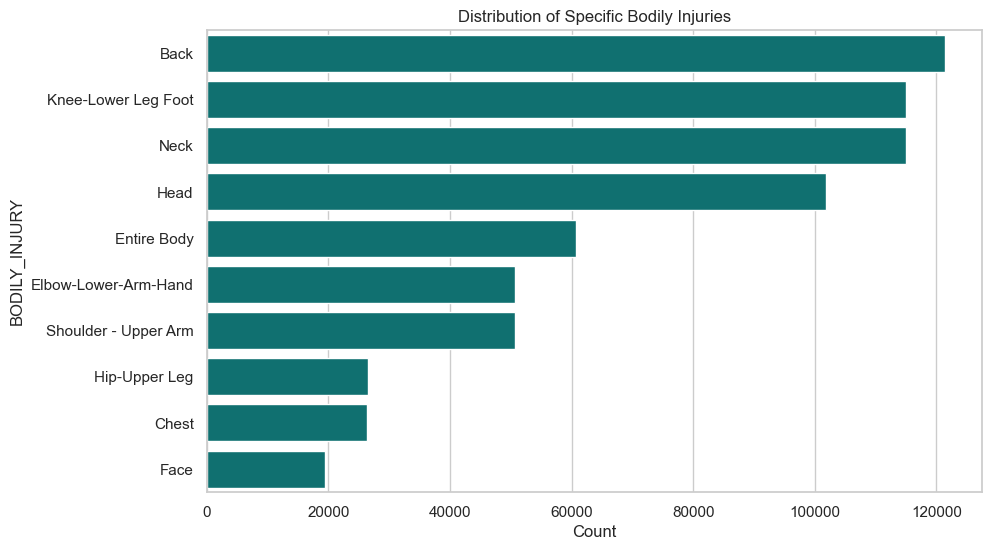

In [21]:
# Filter out 'Does Not Apply' or nulls
injuries = df[~df['BODILY_INJURY'].isin(['Does Not Apply', 'Unknown'])]['BODILY_INJURY'].value_counts().head(10)

plt.figure(figsize=(10, 6))
sns.barplot(y=injuries.index, x=injuries.values, color='teal')
plt.title("Distribution of Specific Bodily Injuries")
plt.xlabel("Count")
plt.show()

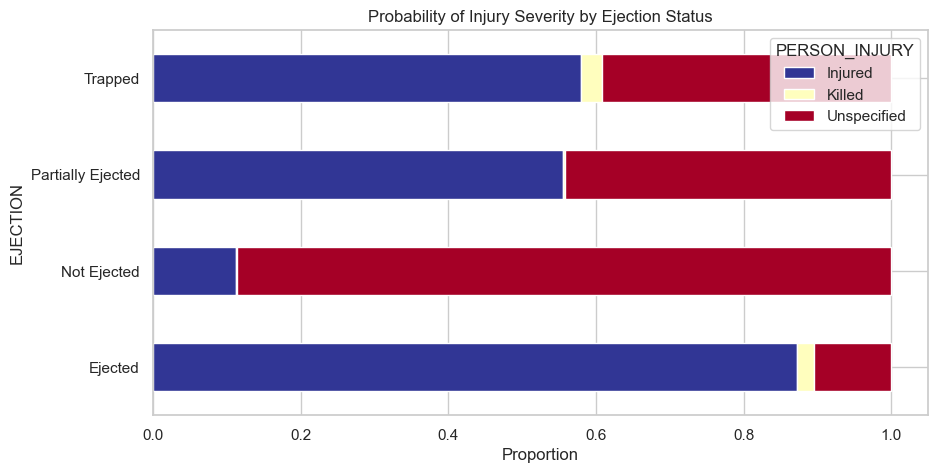

In [22]:
# Filter out nulls/unknowns for clearer plotting
eject_df = df[~df['EJECTION'].isin(['Does Not Apply', 'Unknown', np.nan])]

# Crosstab
ct_eject = pd.crosstab(eject_df['EJECTION'], eject_df['PERSON_INJURY'], normalize='index')

# Plot
ct_eject.plot(kind='barh', stacked=True, colormap='RdYlBu_r', figsize=(10, 5))
plt.title('Probability of Injury Severity by Ejection Status')
plt.xlabel('Proportion')
plt.show()

In [22]:
fig, ax = plt.subplots(figsize=(12, 6))
sns.histplot(data=df[df['PERSON_SEX'] == 'M'], x='PERSON_AGE', color='blue', label='Male', kde=True, element="step")
# Plot Female counts as negative to create the mirror effect, or just overlay with transparency
sns.histplot(data=df[df['PERSON_SEX'] == 'F'], x='PERSON_AGE', color='red', label='Female', kde=True, element="step", alpha=0.5)

plt.title("Age and Gender Distribution of Persons Involved")
plt.legend()
plt.show()

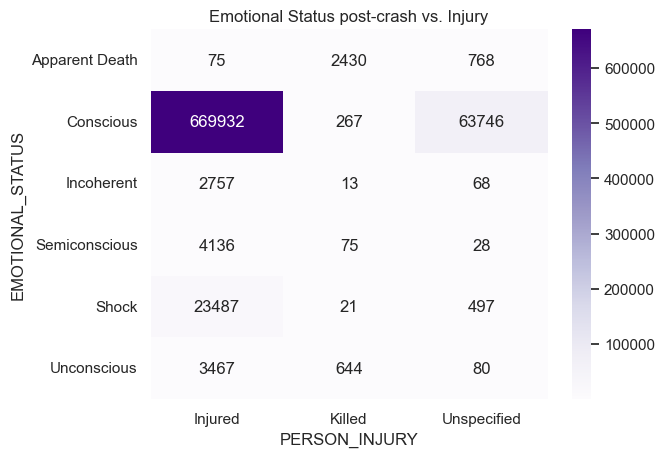

In [23]:
# Filter for relevant statuses
emotional_df = df[~df['EMOTIONAL_STATUS'].isin(['Does Not Apply', 'Unknown'])]
emotional_ct = pd.crosstab(emotional_df['EMOTIONAL_STATUS'], emotional_df['PERSON_INJURY'])

sns.heatmap(emotional_ct, annot=True, fmt='d', cmap="Purples")
plt.title("Emotional Status post-crash vs. Injury")
plt.show()

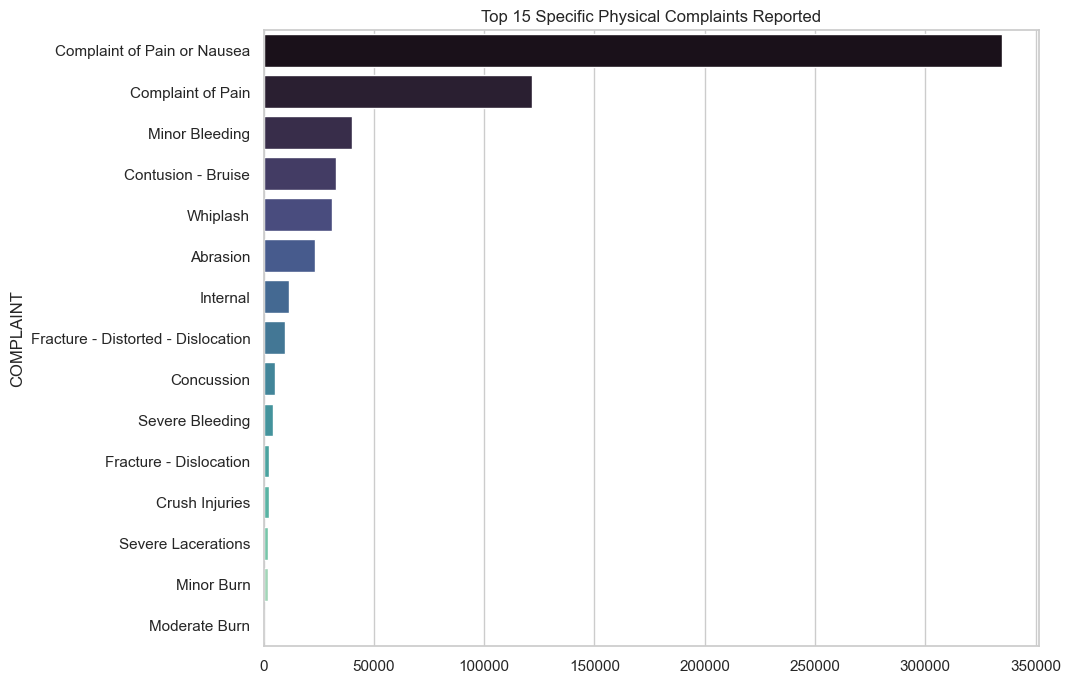

In [24]:
complaints = df[~df['COMPLAINT'].isin(['Does Not Apply', 'Unknown', 'None Visible'])]['COMPLAINT'].value_counts().head(15)

plt.figure(figsize=(10, 8))
sns.barplot(x=complaints.values, y=complaints.index, palette="mako")
plt.title("Top 15 Specific Physical Complaints Reported")
plt.show()

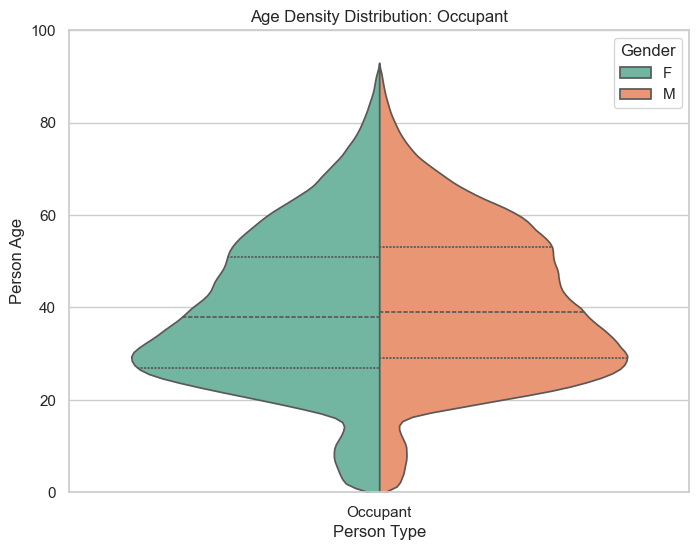

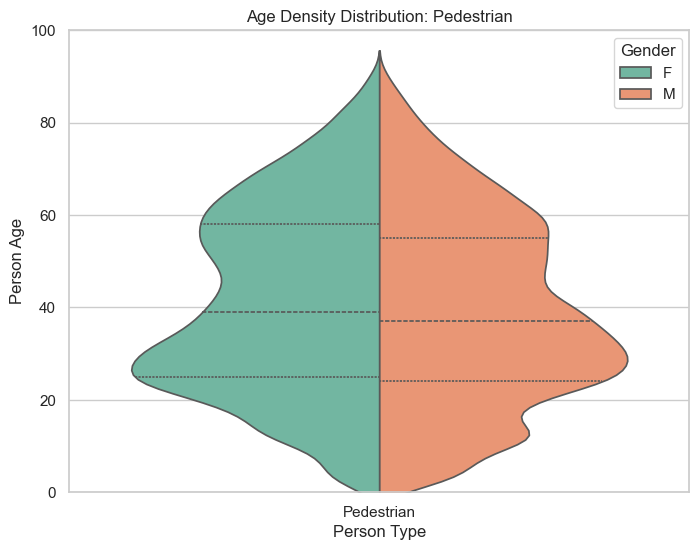

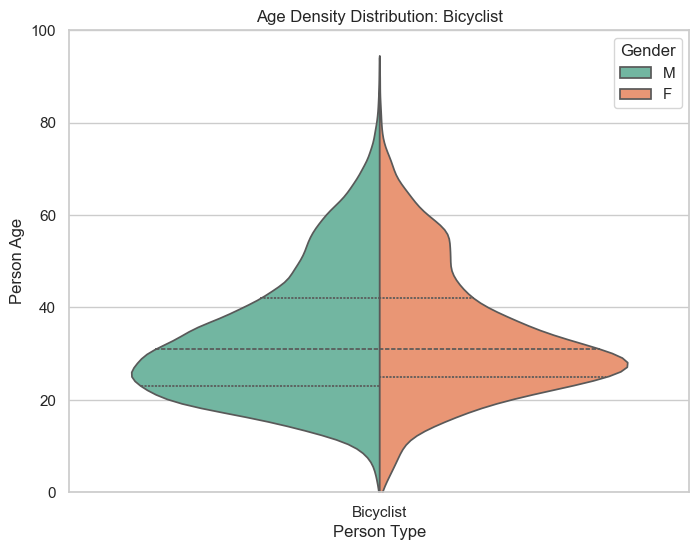

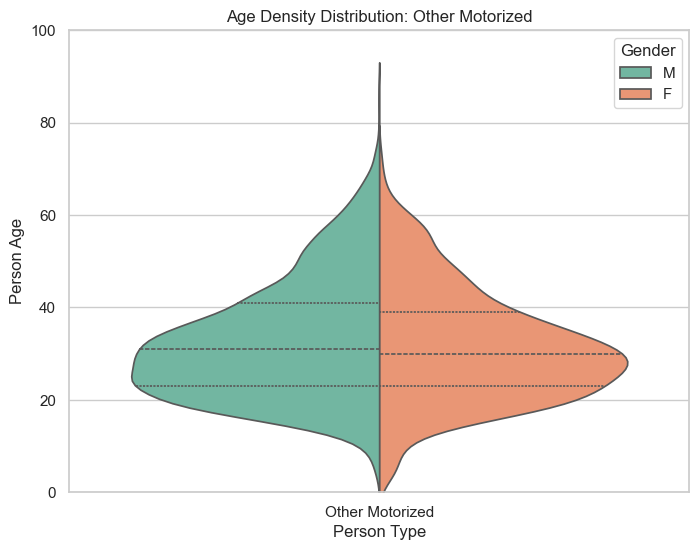

In [27]:
# ==========================================
# Visualization: Age Distribution by Person Type (Gender Comparison)
# ==========================================

# Data Pre-processing
# Filter the dataset to include only 'Male' (M) and 'Female' (F) entries.
# We exclude 'Unknown' (U) to ensure a clear binary comparison in the split violin plot.
# .copy() is used to ensure we are working with a distinct dataframe, preventing SettingWithCopyWarning.
df_filtered = df[df['PERSON_SEX'].isin(['M', 'F'])].copy()

# Retrieve the list of unique person types (e.g., Pedestrian, Occupant, etc.) to iterate over.
person_types = df_filtered['PERSON_TYPE'].unique()

# Plot Generation Loop
# Iterate through each unique Person Type to generate a standalone visualization for each category.
for p_type in person_types:
    # Initialize a new figure canvas for the current iteration
    plt.figure(figsize=(8, 6))

    # Create a subset of the data specific to the current Person Type
    subset = df_filtered[df_filtered['PERSON_TYPE'] == p_type]

    # Generate the Violin Plot
    # split=True is used to compare the distributions of 'M' and 'F' side-by-side on the same violin.
    sns.violinplot(
        x='PERSON_TYPE',
        y='PERSON_AGE',
        hue='PERSON_SEX',
        data=subset,
        split=True,
        palette='Set2',
        inner='quartile'  # Optional: Adds lines for quartiles to increase analytical value
    )

    # Formatting
    # dynamic title based on the current loop iteration
    plt.title(f"Age Density Distribution: {p_type}")
    plt.ylabel("Person Age")
    plt.xlabel("Person Type")

    # Limit Y-axis to reasonable human age range (0-100) to remove outliers/errors
    plt.ylim(0, 100)

    # Display the legend and the plot
    plt.legend(title='Gender')
    plt.show()

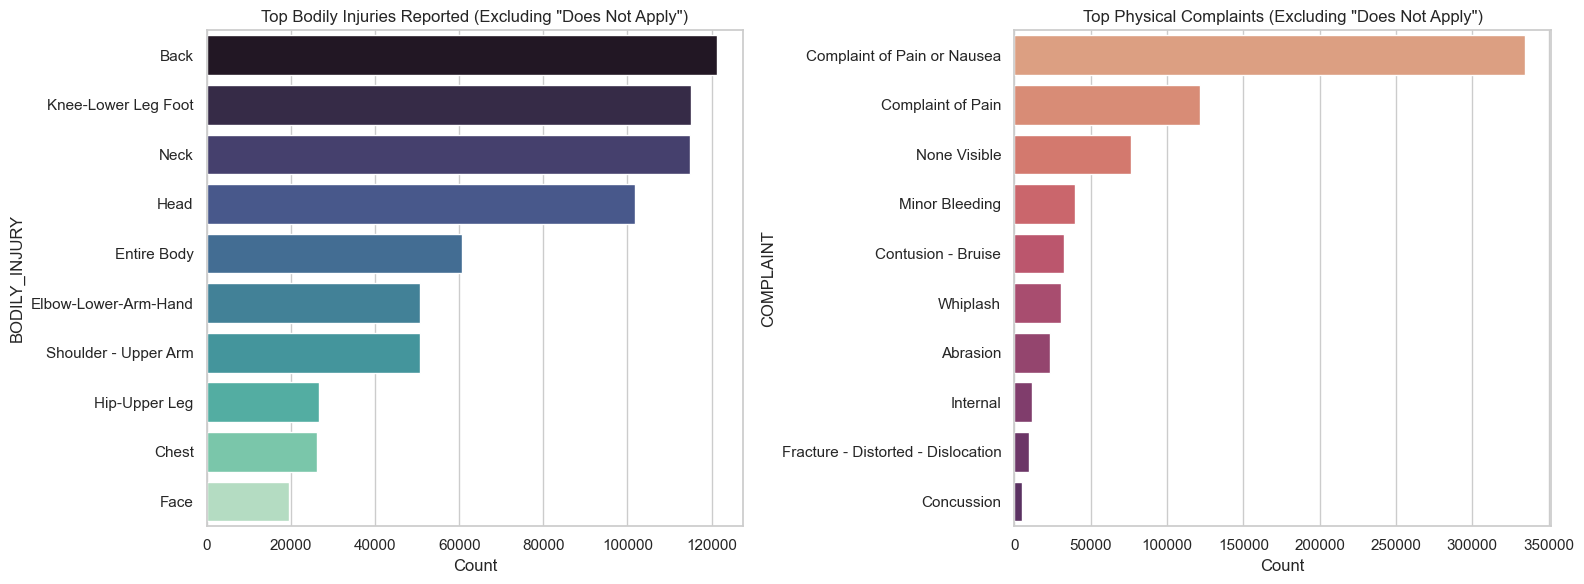

In [30]:
#Define values you want to ignore
ignore_values = ['Does Not Apply', 'Unknown']

fig, axes = plt.subplots(1, 2, figsize=(16, 6))

# --- Bodily Injury ---
# Filter the dataframe to exclude the ignore_values
filtered_bodily = df[~df['BODILY_INJURY'].isin(ignore_values)]
top_bodily = filtered_bodily['BODILY_INJURY'].value_counts().head(10)

sns.barplot(y=top_bodily.index, x=top_bodily.values, ax=axes[0], palette='mako')
axes[0].set_title('Top Bodily Injuries Reported (Excluding "Does Not Apply")')
axes[0].set_xlabel('Count')

# --- Complaint ---
# Filter the dataframe to exclude the ignore_values
filtered_complaint = df[~df['COMPLAINT'].isin(ignore_values)]
top_complaint = filtered_complaint['COMPLAINT'].value_counts().head(10)

sns.barplot(y=top_complaint.index, x=top_complaint.values, ax=axes[1], palette='flare')
axes[1].set_title('Top Physical Complaints (Excluding "Does Not Apply")')
axes[1].set_xlabel('Count')

plt.tight_layout()
plt.show()